# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:Darkblue"> EDA: Startup Battlefield

Objective: Perform the below tasks

![Tasks1](Startup_Battlefield_tasks1.PNG)

![Tasks2](Startup_Battlefield_tasks2.PNG)

In [383]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import numpy as np

In [384]:
%matplotlib inline
sns.set(color_codes=True)

In [385]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## 1. Data Warehouse

### Read the CSV

In [386]:
cData = pd.read_csv("CompanyX_EU.csv")

In [387]:
cData.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


In [388]:
cData.tail()

,Startup,Product,Funding,Event,Result,OperatingState
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating
661,Zumper,zumper.com,$31.5M,Disrupt SF 2012,Finalist,Operating


In [389]:
cData.sample(10)

,Startup,Product,Funding,Event,Result,OperatingState
434,Publish2,publish2.com,$2.8M,Disrupt NYC 2010,Finalist,Operating
267,Insttant,insttant.com,NaN,TC50 2009,Contestant,Operating
405,Pathmapp,pathmapp.com,NaN,Disrupt SF 2012,Contestant,Closed
214,Glance Clock,glanceclock.com,$755.9K,Hardware Battlefield 2016,Contestant,Operating
16,Aircall,aircall.io,$11.6M,Disrupt SF 2015,Contestant,Operating
187,Fit Analytics,fitanalytics.com,NaN,Disrupt Beijing 2011,Contestant,Operating
546,StyleSeat,styleseat.com,$40M,Disrupt NYC 2011,Contestant,Operating
533,Stepcase,stepcase.com,NaN,Disrupt Beijing 2011,Contestant,Operating
115,Cocodot,cocodot.com,$6.7M,TC50 2009,Contestant,Closed
110,ClientShow,clientshow.com,$750K,TC50 2009,Contestant,Closed


In [390]:
cData.describe()

,Startup,Product,Funding,Event,Result,OperatingState
count,662,656,448,662,662,662
unique,662,656,240,26,5,4
top,DigitalGenius,dryft.com,$1M,TC50 2008,Contestant,Operating
freq,1,1,17,52,488,465


In [391]:
cData.shape

(662, 6)

## 2. Data Exploration

### Check the datatypes of each attribute

In [392]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


### Check the null values in each attribute

In [393]:
cData.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

## 3. Data Preprocessing and Visualization

### Drop the null values

In [394]:
cData= cData.dropna()

###  Convert the 'Funding' feature to a numerical value


In [395]:
pd.set_option('mode.chained_assignment', None)
# Remove the dollar symbol
cData['Funding'] = cData['Funding'].str.replace('$','')

In [396]:
# multiply values with respective 10^x
cData['Funding'] = cData['Funding'].replace({'K': '*1e3', 'M': '*1e6', 'B':'*1e9'}, regex=True).map(pd.eval).astype(int)

### Plot box plot for funds in million

In [397]:

cData['Funding'] = cData['Funding']/1000000


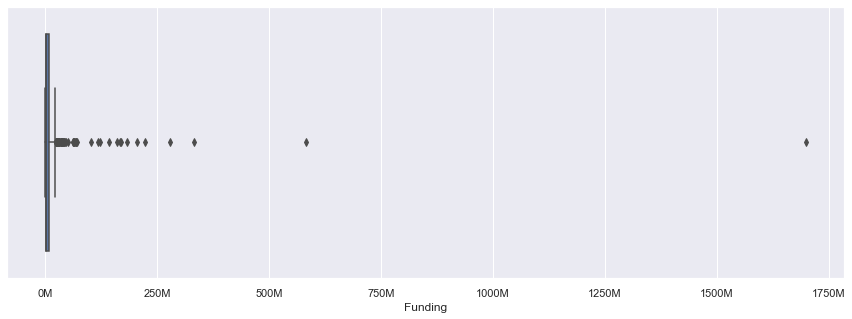

In [398]:
plt.figure(figsize=(15,5))
p = sns.boxplot(x='Funding', data=cData);
xlabels = ['{:n}'.format(x) + 'M' for x in p.get_xticks()]
p.set_xticklabels(xlabels);

### Get the lower fence from the box plot

In [399]:
#quantiles = cData['Funding'].quantile([0.25])
lowerFence = np.percentile(cData.Funding,25)
upperFence = np.percentile(cData.Funding, 75)
print(color.PURPLE+"Lower fence (1Q) is "+ str(lowerFence)+color.END)

Lower fence (1Q) is 0.74525


### Check number of outliers greater than the upper fence

In [400]:
print("Upper fence (3Q) is "+ str(upperFence))
upperOutliers = cData[cData['Funding'] > upperFence]
print(color.PURPLE+"Number of outlier greater than upper fence are: "+str(len(upperOutliers))+color.END)

Upper fence (3Q) is 9.475
Number of outlier greater than upper fence are: 112


### Drop the values that are greater than upper fence

In [401]:
#  we retain only those below the upperFence, rest are removed
cData = cData[cData['Funding'] < upperFence]
cData.shape

(334, 6)

### Plot the box plot after dropping the values

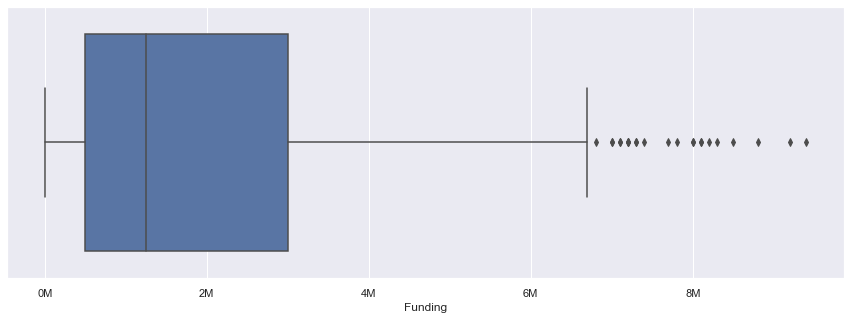

In [402]:
plt.figure(figsize=(15,5))
p = sns.boxplot(x='Funding', data=cData);
xlabels = ['{:n}'.format(x) + 'M' for x in p.get_xticks()]
p.set_xticklabels(xlabels);

### Check frequency of the OperatingState feature classes

In [403]:
print(color.UNDERLINE+"Freqency Count"+color.END)
cData.OperatingState.value_counts()

Freqency Count


Operating    242
Closed        51
Acquired      41
Name: OperatingState, dtype: int64

### Plot a distribution for Funds in million

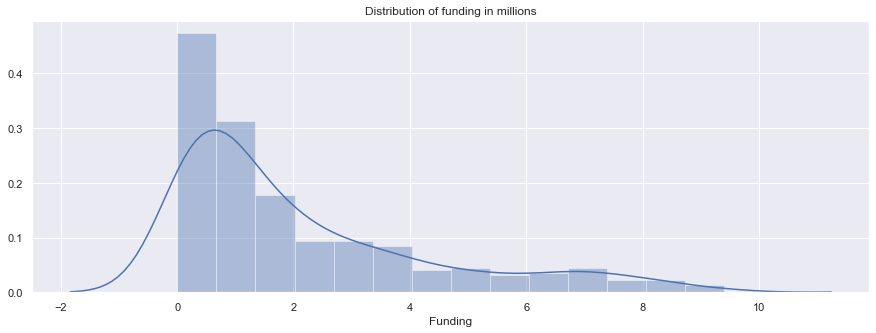

In [404]:
plt.figure(figsize=(15,5))
plt.title("Distribution of funding in millions")
sns.distplot(cData['Funding']);

### Plot distribution plots for companies still operating and companies that closed.

<Figure size 1080x360 with 0 Axes>

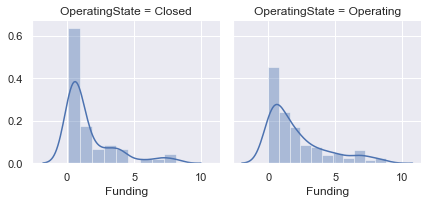

In [405]:
plt.figure(figsize=(15,5))
opStates = cData[(cData['OperatingState']=="Closed") | (cData['OperatingState']=="Operating")]
g = sns.FacetGrid(opStates, col="OperatingState");
g.map(sns.distplot, "Funding");
g.add_legend();

## 4. Statistical Analysis

### Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? 

- Write the null hypothesis and alternative hypothesis

**Null Hypothesis:** There is no significant difference between funds raised by companies that are still operating versus companies that closed down

**Alternative Hypothesis:** There is significant difference between funds raised by companies that are still operating versus companies that closed down

- Test for significance and conclusion

We choose a level of significance as 0.05

In [406]:
fundingOfOperating = cData[(cData['OperatingState']=="Operating")]['Funding']
fundingOfClosed = cData[(cData['OperatingState']=="Closed")]['Funding']


In [407]:
fundingOfOperating = fundingOfOperating.to_numpy()
fundingOfClosed = fundingOfClosed.to_numpy()

In [408]:
fund_difference_df = pd.DataFrame()

df1            = pd.DataFrame({'Fund_Type': 'FO', 'Fund_Amt':fundingOfOperating})
df2            = pd.DataFrame({'Fund_Type': 'FC', 'Fund_Amt':fundingOfClosed})
fund_difference_df = fund_difference_df.append(df1)
fund_difference_df = fund_difference_df.append(df2)

In [409]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Fund_Amt ~ Fund_Type',data = fund_difference_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df        F    PR(>F)
Fund_Type    10.898369    1.0  2.38016  0.123972
Residual   1332.442010  291.0      NaN       NaN


P-value > α: The differences are not statistically significant. We dot have enough evidence to reject the null hypothesis

**Conclusion**: There is no significant difference between funds raised by companies that are still operating versus companies that closed down

### Make a copy of the original data frame

In [410]:
cDataCopy = cData.copy()

### Check frequency distribution of Result variable

In [411]:
cData.Result.value_counts()

Contestant         251
Finalist            42
Audience choice     20
Runner up           11
Winner              10
Name: Result, dtype: int64

### Calculate percentage of winners that are still operating and percentage of contestants that are still operating

In [412]:
winnerAndOperating = len(cData[(cData['Result']=="Winner") & (cData['OperatingState']=="Operating")])
contestantsAndOperating = len(cData[(cData['Result']=="Contestant") & (cData['OperatingState']=="Operating")])
total = len(cData)
winPercentOperating = (winnerAndOperating/total)*100
contestantPercentOperating = (contestantsAndOperating/total)*100

In [413]:
print(color.BOLD+color.PURPLE+"Winners still operating: "+ str(round(winPercentOperating,2))+" %"+color.END)
print(color.BOLD+color.PURPLE+"Contestants still operating: "+ str(round(contestantPercentOperating,2))+" %"+color.END)

Winners still operating: 2.4 %
Contestants still operating: 51.8 %


### Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:

- Write the null hypothesis and alternative hypothesis.

**Null hypothesis:** There is a large proportion of winners that are still operating 

**Alternative Hypothesis:** There is no large proportion of winners that are still operating

- Test for significance and conclusion

Choosing a level of significance as 0.05

In [414]:
from statsmodels.stats.proportion import proportions_ztest
n_winners = len(cData[(cData['Result']=="Winner")])
n_contestant = len(cData[(cData['Result']=="Contestant")])
stat, pval = proportions_ztest([winnerAndOperating, contestantsAndOperating] , [n_winners, n_contestant])

if pval < 0.05:
    print(color.BOLD+color.PURPLE+f'With a p-value of {round(pval,4)} the difference is significant.'+color.END)
else:
    print(color.BOLD+color.PURPLE+f'With a p-value of {round(pval,4)} the difference is not significant.'+color.END)


With a p-value of 0.4563 the difference is not significant.


**Conclusion:** We reject the null hypothesis. *There is no large proportion of winners that are still operating*

### Check distribution of the Event variable

In [415]:
cData.Event.value_counts()

Disrupt NY 2015              20
Disrupt SF 2013              18
TC50 2008                    18
Disrupt SF 2015              17
Disrupt NYC 2013             17
Disrupt SF 2016              17
Disrupt NYC 2012             17
TC50 2009                    16
Disrupt NY 2016              15
TC40 2007                    15
Disrupt SF 2014              15
Disrupt SF 2012              14
Disrupt SF 2011              14
Disrupt NYC 2011             13
Hardware Battlefield 2014    12
Disrupt NYC 2014             11
Disrupt SF 2010              11
Disrupt London 2016          10
Hardware Battlefield 2016    10
Hardware Battlefield 2015    10
Disrupt EU 2014               9
Disrupt London 2015           9
Disrupt NYC 2010              8
Disrupt EU 2013               8
-                             6
Disrupt Beijing 2011          4
Name: Event, dtype: int64

### Select only the Event that has disrupt keyword from 2013 onwards

In [416]:
def greaterThan2013(event):
    match = re.search("\d{4}", event)
    if not match is None:
        if int(match.group(0))  >= 2013:
            return True
        else:
            return False

In [417]:
EventsWithDisruptSince2013 = cData[(cData['Event'].str.contains('Disrupt')) & (cData['Event'].apply(greaterThan2013))]
EventsWithDisruptSince2013

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,0.630,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,1.000,Disrupt NY 2016,Audience choice,Operating
13,Agrilyst,agrilyst.com,1.000,Disrupt SF 2015,Winner,Operating
14,Aiden,aiden.ai,0.750,Disrupt London 2016,Contestant,Operating
42,asap54.com,asap54.com,8.300,Disrupt EU 2013,Runner up,Operating
...,...,...,...,...,...,...
634,Wellthy,wellthy.com,2.000,Disrupt SF 2015,Contestant,Operating
635,Welltwigs,welltwigs.com,0.050,Disrupt NY 2015,Contestant,Operating
642,Xendo,xendo.com,0.028,Disrupt SF 2014,Contestant,Acquired
646,YayPay Inc,yaypay.com,0.900,Disrupt London 2015,Contestant,Operating


### Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards.

**Null Hypothesis**: There is no significant difference between funds raised from the three cities

**Alternate Hypothesis**: This is a significant difference between funds raised from the three cities

Choosing level of significance: 0.05

In [418]:
#Funds raised from NY
fundsRaisedAtNY = cData[(cData['Event'].str.contains('NY')) & (cData['Event'].apply(greaterThan2013))]['Funding']
#Funds raised from SF
fundsRaisedAtSF = cData[(cData['Event'].str.contains('SF')) & (cData['Event'].apply(greaterThan2013))]['Funding']
#Funds raised from EU
fundsRaisedAtEU = cData[(cData['Event'].str.contains('EU')) & (cData['Event'].apply(greaterThan2013))]['Funding']

In [419]:
f1 = pd.DataFrame(fundsRaisedAtNY,columns=['Funding'])
f2 = pd.DataFrame(fundsRaisedAtSF,columns=['Funding'])
f3 = pd.DataFrame(fundsRaisedAtEU,columns=['Funding'])
f1['At'] = "NY";
f2['At'] = "SF"
f3['At'] = "EU"

funds = pd.concat([f1,f2,f3])

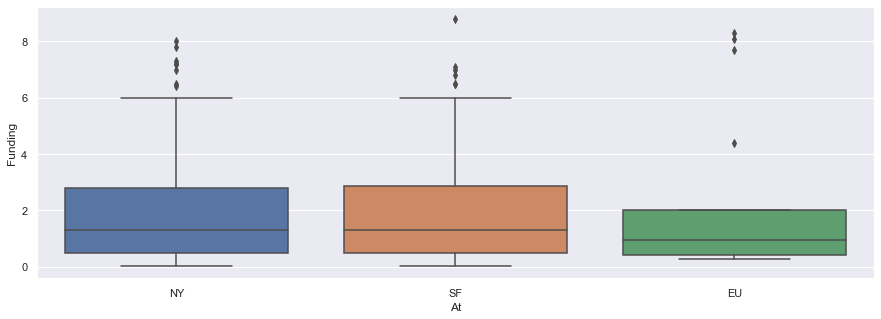

In [420]:
plt.figure(figsize=(15,5))
sns.boxplot(y="Funding",x="At", data=funds);

In [421]:
print("Funds raised at NY: mean="+str(fundsRaisedAtNY.mean())+" median="+str(fundsRaisedAtNY.median()))
print("Funds raised at SF: mean="+str(fundsRaisedAtSF.mean())+" median="+str(fundsRaisedAtSF.median()))
print("Funds raised at EU: mean="+str(fundsRaisedAtEU.mean())+" median="+str(fundsRaisedAtEU.median()))


fundsRaisedAtNY = fundsRaisedAtNY.to_numpy()
fundsRaisedAtSF = fundsRaisedAtSF.to_numpy()
fundsRaisedAtEU = fundsRaisedAtEU.to_numpy()

fund_raised_df = pd.DataFrame()

df1            = pd.DataFrame({'Fund_Raised_At': 'NY', 'Fund_Amt':fundsRaisedAtNY})
df2            = pd.DataFrame({'Fund_Raised_At': 'SF', 'Fund_Amt':fundsRaisedAtSF})
df3            = pd.DataFrame({'Fund_Raised_At': 'EU', 'Fund_Amt':fundsRaisedAtEU})
fund_raised_df = fund_raised_df.append(df1)
fund_raised_df = fund_raised_df.append(df2)
fund_raised_df = fund_raised_df.append(df3)

Funds raised at NY: mean=2.293025380952381 median=1.3
Funds raised at SF: mean=2.04860895522388 median=1.3
Funds raised at EU: mean=2.2785235294117645 median=0.948


In [422]:
mod = ols('Fund_Amt ~ Fund_Raised_At',data = fund_raised_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq     df         F    PR(>F)
Fund_Raised_At    2.126487    2.0  0.188431  0.828462
Residual        812.537521  144.0       NaN       NaN


P-value > α: The differences between are not statistically significant. We do not have enough evidence to reject the null hypothesis.

**Conclusion**: There is no significant difference between funds raised from the three cities

### Plot the distribution plot comparing the 3 city events

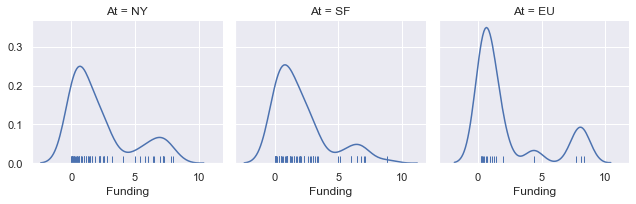

In [424]:
#plt.figure(figsize=(15,5));
#plt.title("Distribution of funding in millions")
#sns.distplot(cData['Funding']);
g = sns.FacetGrid(funds, col='At', palette="Set1");
g = (g.map(sns.distplot, "Funding", hist=False, rug=True));

## 5. Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform a better data analysis.

1. 32.3 % of values in Funding column is empty
2. Few values in events is not given and is filled with -
3. Otherwise, quality of dataset is good and well formatted.